In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# read raw csv
# encoding = "ISO-8859-1" Ty TA Reed
file = "Resources/uk_gov_data_sparse_preproc.csv"
df_raw = pd.read_csv(file, encoding="ISO-8859-1")
df_raw.head()

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0


In [3]:
# Many null values, we need to investigate
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6756 non-null   float64
 1   manufacturer          6756 non-null   object 
 2   model                 6756 non-null   object 
 3   description           6756 non-null   object 
 4   transmission          6609 non-null   object 
 5   transmission_type     6756 non-null   object 
 6   engine_size_cm3       6755 non-null   float64
 7   fuel                  6756 non-null   object 
 8   powertrain            6756 non-null   object 
 9   power_ps              6712 non-null   float64
 10  co2_emissions_gPERkm  6756 non-null   float64
dtypes: float64(4), object(7)
memory usage: 580.7+ KB


In [4]:
# Locate, Identify, and drop car ID's with an electric transmission (they dont emit co2)
e_transmission_i = df_raw[(df_raw.transmission_type == "Electric - Not Applicable")].index
df_emissions_raw = df_raw.drop(e_transmission_i)
df_emissions_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6654 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6654 non-null   float64
 1   manufacturer          6654 non-null   object 
 2   model                 6654 non-null   object 
 3   description           6654 non-null   object 
 4   transmission          6608 non-null   object 
 5   transmission_type     6654 non-null   object 
 6   engine_size_cm3       6654 non-null   float64
 7   fuel                  6654 non-null   object 
 8   powertrain            6654 non-null   object 
 9   power_ps              6618 non-null   float64
 10  co2_emissions_gPERkm  6654 non-null   float64
dtypes: float64(4), object(7)
memory usage: 623.8+ KB


In [5]:
null_ps = df_emissions_raw[(df_emissions_raw.power_ps == 0)].index
df_emissions = df_emissions_raw.drop(null_ps)
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6642 non-null   float64
 1   manufacturer          6642 non-null   object 
 2   model                 6642 non-null   object 
 3   description           6642 non-null   object 
 4   transmission          6597 non-null   object 
 5   transmission_type     6642 non-null   object 
 6   engine_size_cm3       6642 non-null   float64
 7   fuel                  6642 non-null   object 
 8   powertrain            6642 non-null   object 
 9   power_ps              6606 non-null   float64
 10  co2_emissions_gPERkm  6642 non-null   float64
dtypes: float64(4), object(7)
memory usage: 622.7+ KB


In [6]:
df_emissions1 = df_emissions.dropna(subset=["power_ps"])
df_emissions1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6606 non-null   float64
 1   manufacturer          6606 non-null   object 
 2   model                 6606 non-null   object 
 3   description           6606 non-null   object 
 4   transmission          6563 non-null   object 
 5   transmission_type     6606 non-null   object 
 6   engine_size_cm3       6606 non-null   float64
 7   fuel                  6606 non-null   object 
 8   powertrain            6606 non-null   object 
 9   power_ps              6606 non-null   float64
 10  co2_emissions_gPERkm  6606 non-null   float64
dtypes: float64(4), object(7)
memory usage: 619.3+ KB


In [7]:
null_emissions = df_emissions1[(df_emissions1.co2_emissions_gPERkm == 0)].index
df_emissions_clean = df_emissions1.drop(null_emissions)
df_emissions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6542 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6542 non-null   float64
 1   manufacturer          6542 non-null   object 
 2   model                 6542 non-null   object 
 3   description           6542 non-null   object 
 4   transmission          6542 non-null   object 
 5   transmission_type     6542 non-null   object 
 6   engine_size_cm3       6542 non-null   float64
 7   fuel                  6542 non-null   object 
 8   powertrain            6542 non-null   object 
 9   power_ps              6542 non-null   float64
 10  co2_emissions_gPERkm  6542 non-null   float64
dtypes: float64(4), object(7)
memory usage: 613.3+ KB


### Question 1: What is the effect of fuel type on CO2 emissions (g/km)?

<Figure size 800x600 with 0 Axes>

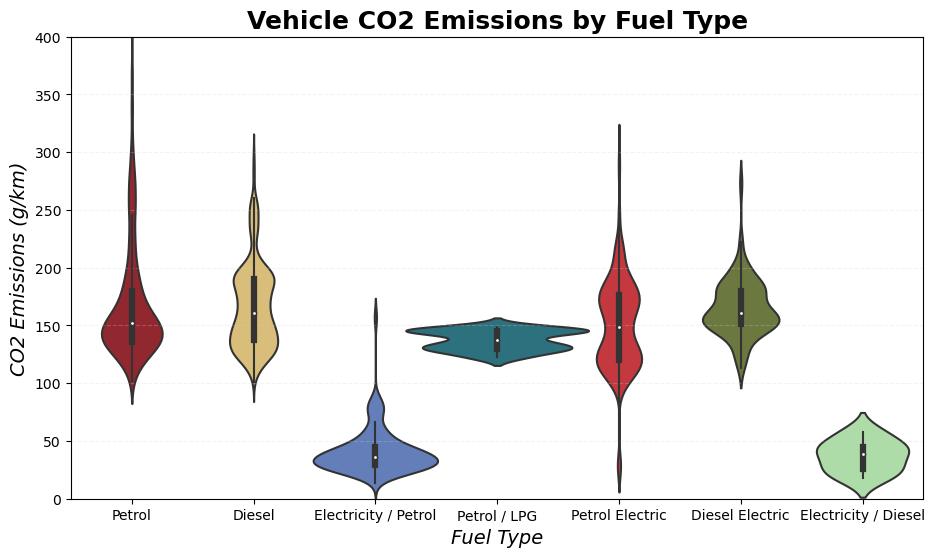

In [10]:
# Step 1: Get the data
data = df_emissions_clean.fuel.value_counts()
colors = ["#a31621", "#e9c46a", "#5579c6", "#1f7a8c", "#db222a", "#708238", "#a8e4a0"]

# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# get the data
data = df_emissions_clean

# create the plot
plt.figure(figsize=(11, 6))
                   
sns.violinplot(data, x="fuel", y="co2_emissions_gPERkm", width=1.5, palette=colors)

# customizations
plt.xlabel("Fuel Type", fontstyle="italic", fontsize=14)
plt.ylabel("CO2 Emissions (g/km)", fontstyle="italic", fontsize=14)
plt.title("Vehicle CO2 Emissions by Fuel Type", fontsize=18, fontweight="bold")
plt.ylim(0, 400)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

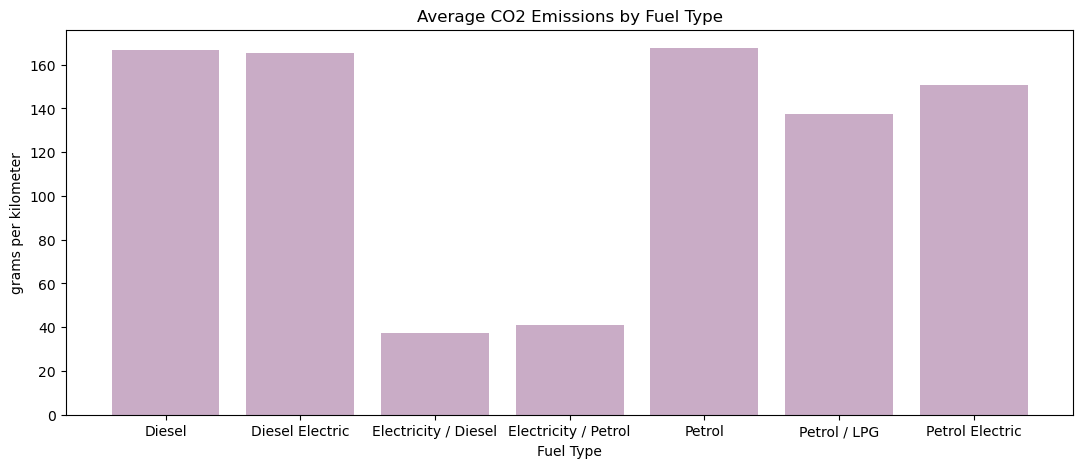

In [53]:
# get the data
data = df_emissions_clean

# size the plot
plt.figure(figsize=(13,5))

# make a new dataframe
avg_by_fuel_type_df = pd.DataFrame(df_emissions_clean.groupby("fuel").mean("co2_emissions_gPERkm"))
avg_by_fuel_type_df


plt.bar(avg_by_fuel_type_df.index, avg_by_fuel_type_df["co2_emissions_gPERkm"],
                         color='#A675A1', alpha=0.6, align="center")

plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("grams per kilometer")
plt.show()
